# Subject-1 Data Analysis

Import the libraries

In [1]:
#importing required library
import pandas
import numpy
import math
# importing matplotlib module
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('default')
# import scipy module
import scipy.signal
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

In [2]:
max_number_of_trials_per_target = 10
file_name = 'sujeto1/force_no_cursor.csv'
target_distance = 2

Load the data from the CSV file

In [3]:
d = pandas.read_csv(file_name)
# Remove unnameed column
d = d.loc[:, ~d.columns.str.contains('^Unnamed')]
print(d.dtypes)
print(d.head())
# Move the data to numpy arrays
data = d.values
print(data)

x         float64
y         float64
color       int64
target      int64
time        int64
dtype: object
          x         y  color  target     time
0  0.006230 -0.017742    241       1   905087
1  0.006230 -0.017742    241       1  1876940
2  0.006230 -0.017742    241       1  2869730
3  0.006230 -0.017742    241       1  3872400
4  0.004153 -0.017742    241       1  4887310
[[ 6.22993e-03 -1.77415e-02  2.41000e+02  1.00000e+00  9.05087e+05]
 [ 6.22993e-03 -1.77415e-02  2.41000e+02  1.00000e+00  1.87694e+06]
 [ 6.22993e-03 -1.77415e-02  2.41000e+02  1.00000e+00  2.86973e+06]
 ...
 [ 9.82318e-01 -1.03664e+00  3.20000e+02  8.00000e+00  1.99802e+09]
 [ 9.82530e-01 -1.03793e+00  3.20000e+02  8.00000e+00  1.99902e+09]
 [ 9.82530e-01 -1.03793e+00  3.20000e+02  8.00000e+00  2.00002e+09]]


Create a list with all the trials for each target

In [4]:
filter_order = 2
Wn_filter = 0.1 # 50Hz cut-off frequency
b, a = scipy.signal.butter(filter_order, Wn_filter, 'low')

targets = numpy.unique(data[:,3])
trial_list = []
for tar in targets:
    # Get all the trials for each target
    trials = numpy.unique(data[data[:,3]==tar,2])
    target_list = []
    for tri in trials:
        selected_rows = numpy.logical_and(data[:,3]==tar,data[:,2]==tri)
        data_array = numpy.zeros((selected_rows.sum(),7))
        data_array[:,0] = data[selected_rows,0]
        data_array[:,1] = data[selected_rows,1]
        data_array[:,2] = data[selected_rows,4]
        # Calculate the derivatives for each axis
        #data_array[1:,4] = numpy.diff(data[selected_rows,0])/numpy.diff(data[selected_rows,5])
        #data_array[1:,5] = numpy.diff(data[selected_rows,1])/numpy.diff(data[selected_rows,5])
        #data_array[1:,6] = numpy.diff(data[selected_rows,2])/numpy.diff(data[selected_rows,5])
        data_array[1:,3] = numpy.diff(data[selected_rows,0])
        data_array[1:,4] = numpy.diff(data[selected_rows,1])
        # Filter the signal
        data_array[:,5] = scipy.signal.filtfilt(b, a, data_array[:,3])
        data_array[:,6] = scipy.signal.filtfilt(b, a, data_array[:,4])
        
        
        target_list.append(data_array)
    trial_list.append(target_list)
#print(trial_list)


Create a function to use a different color for each line we plot

In [5]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=numpy.array(matplotlib.colors.to_rgb(c1))
    c2=numpy.array(matplotlib.colors.to_rgb(c2))
    return matplotlib.colors.to_hex((1-mix)*c1 + mix*c2)

Plot the evolution for each target

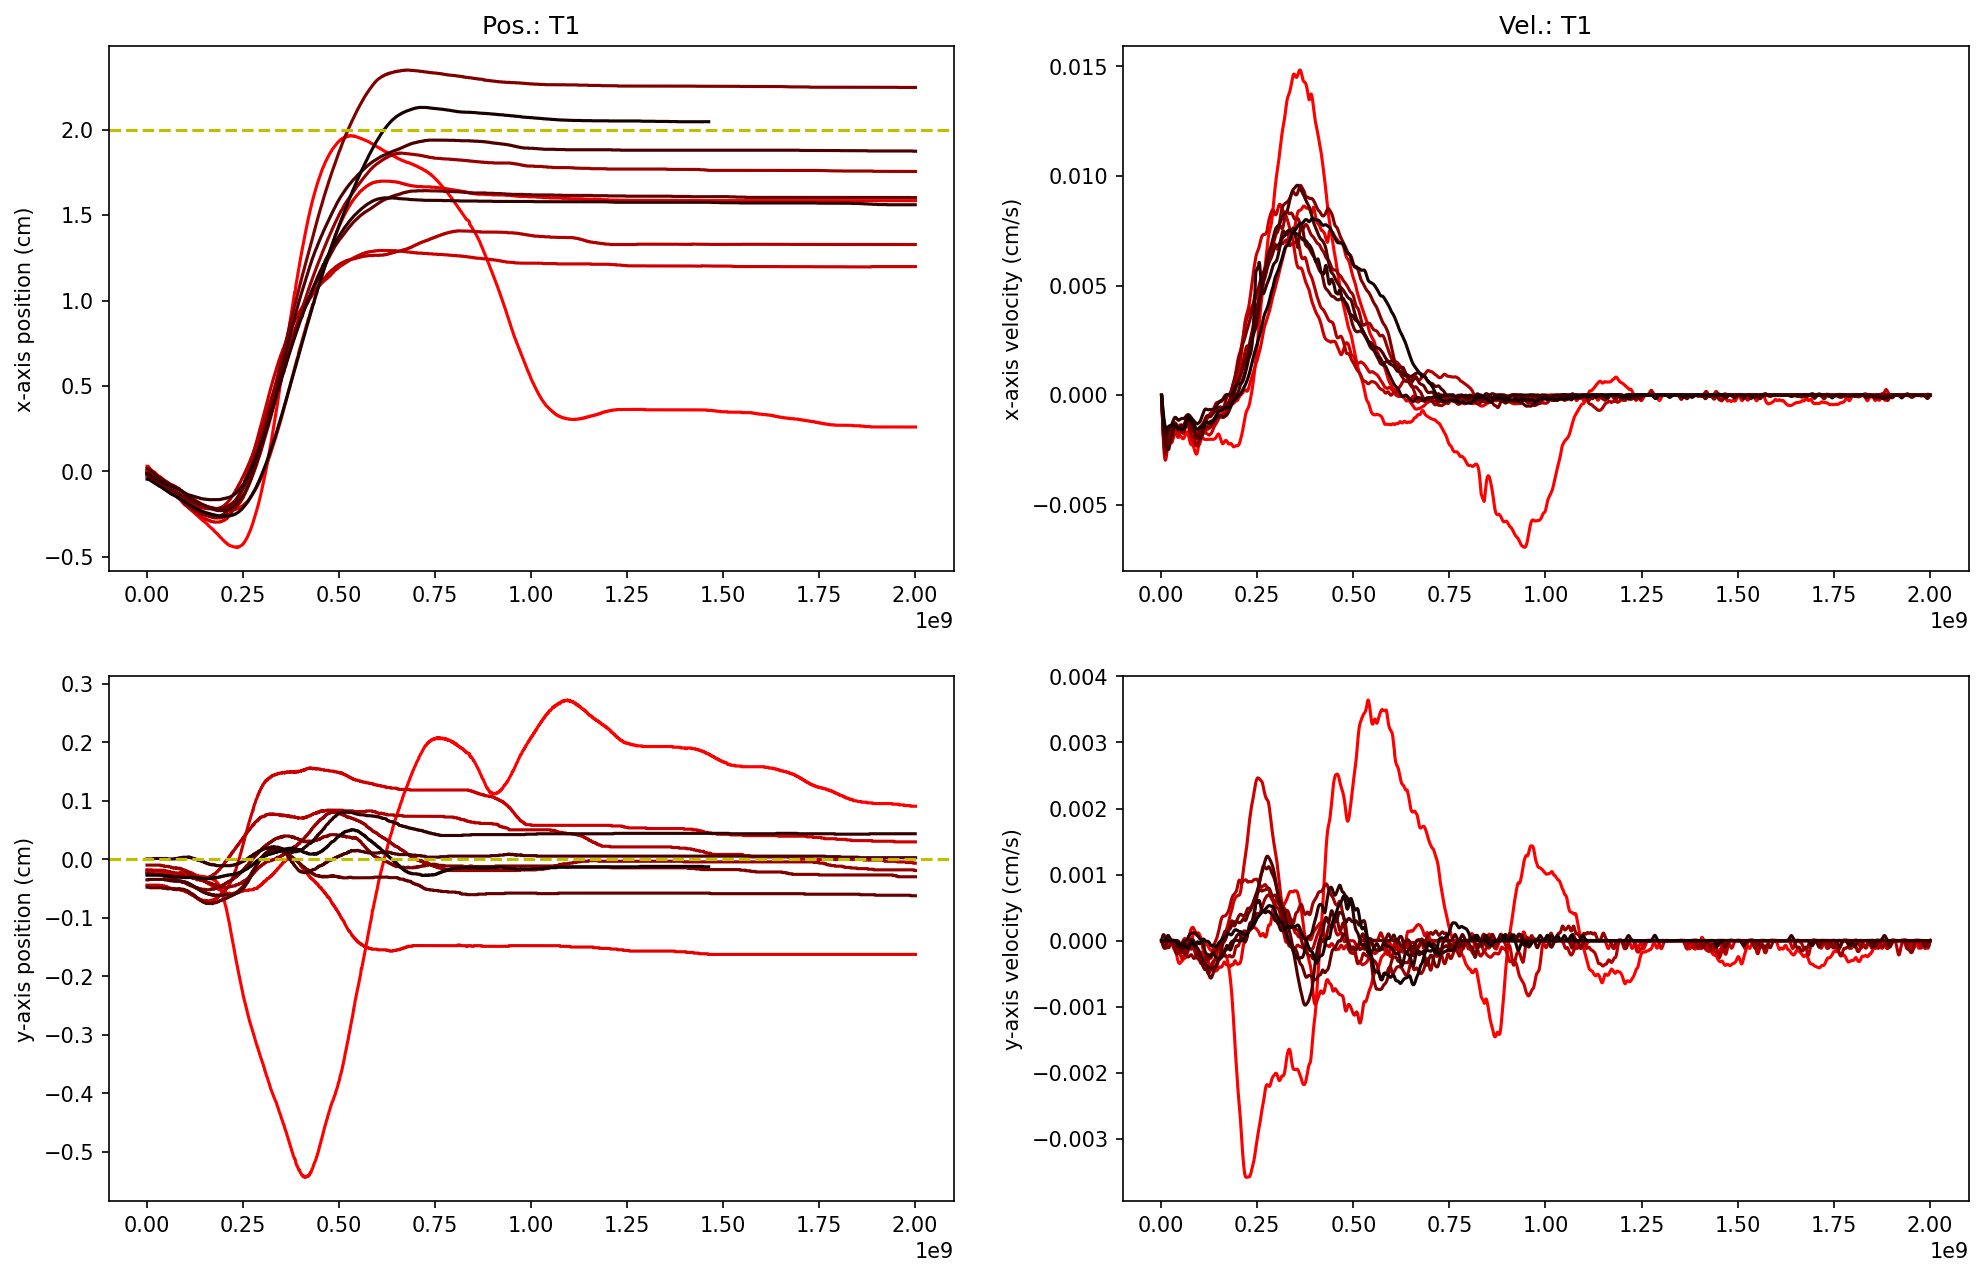

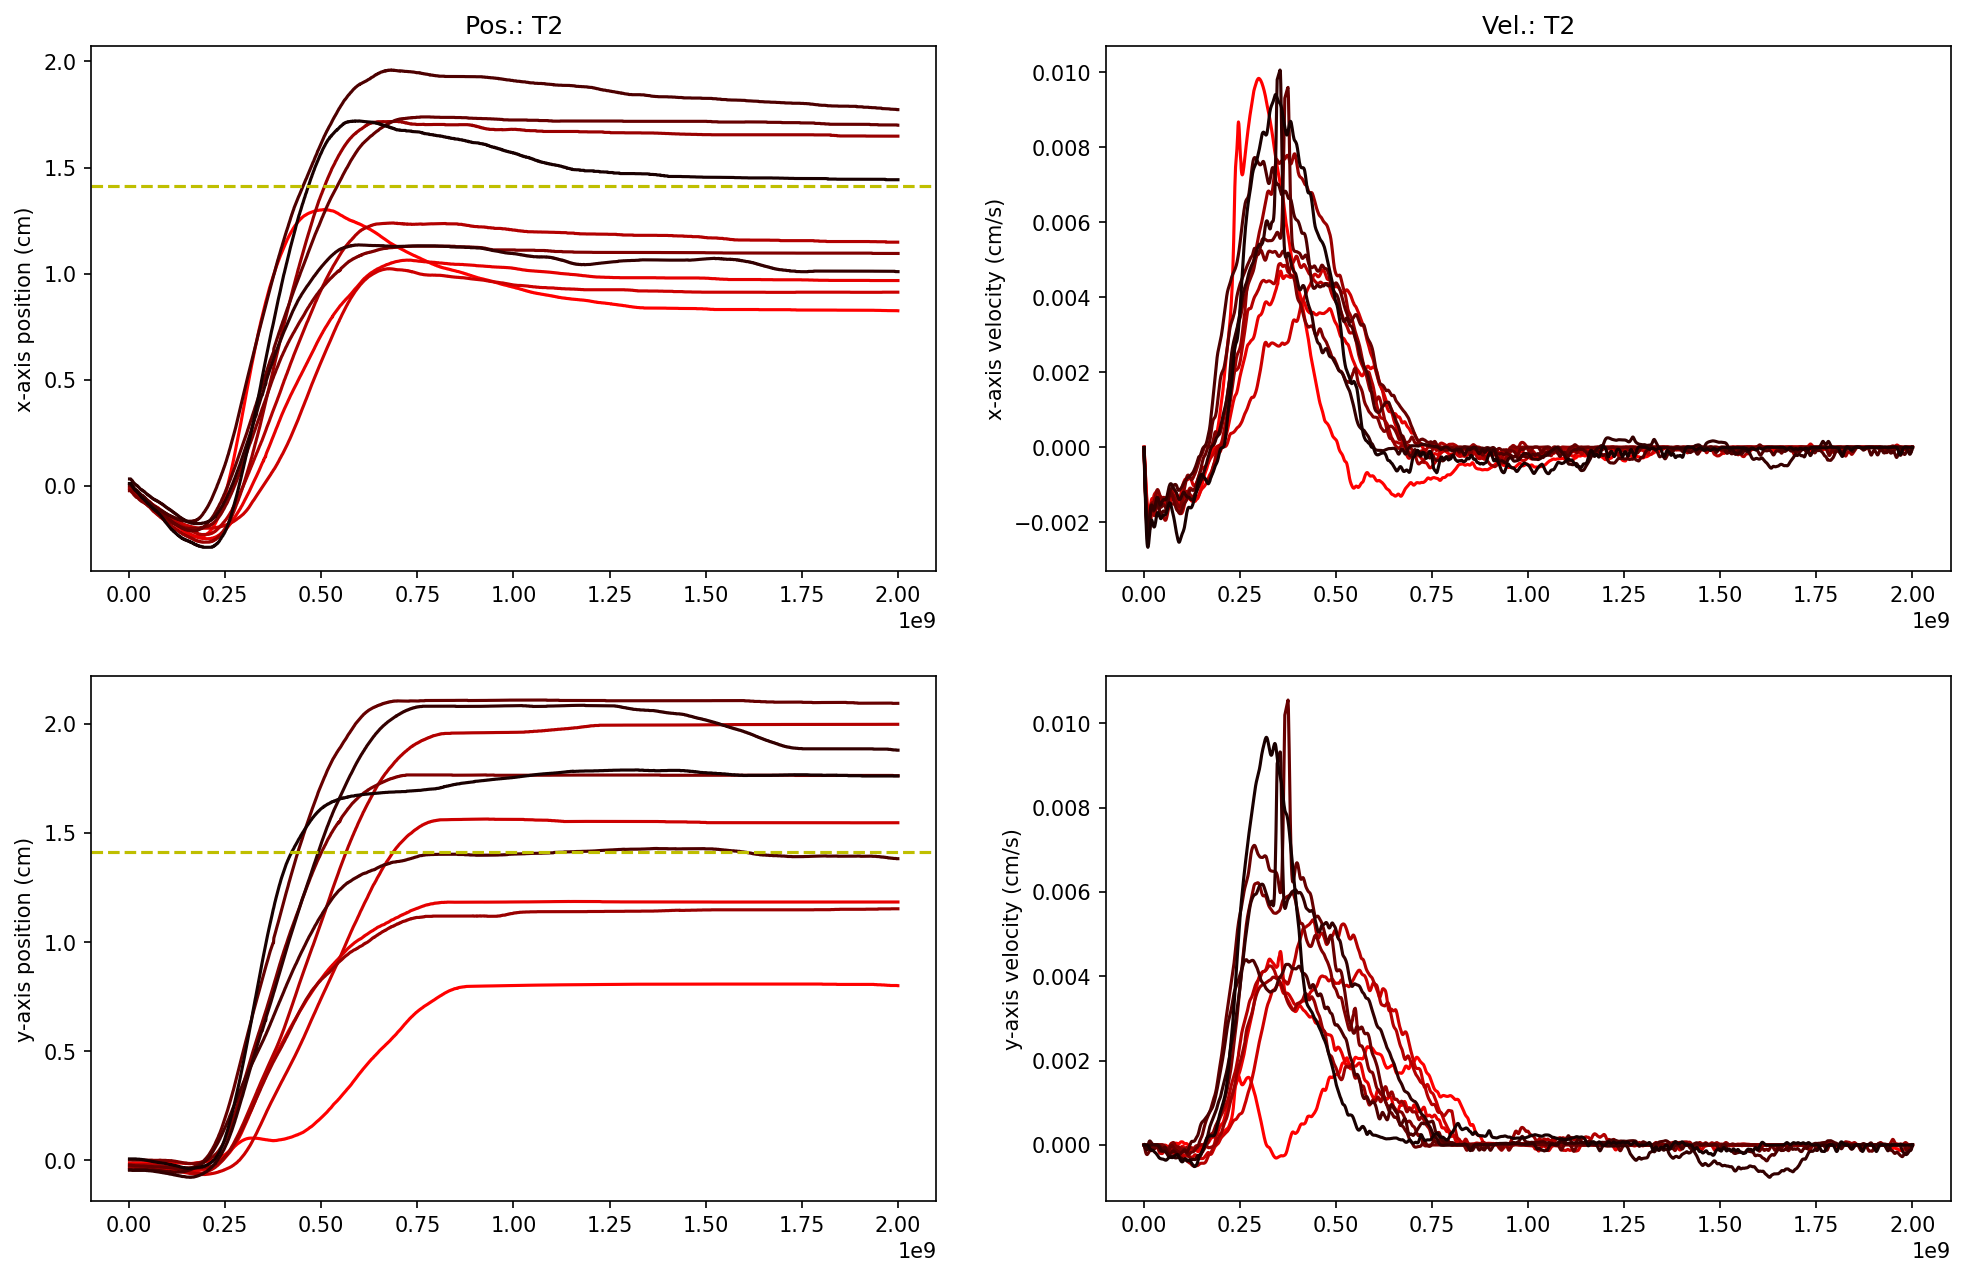

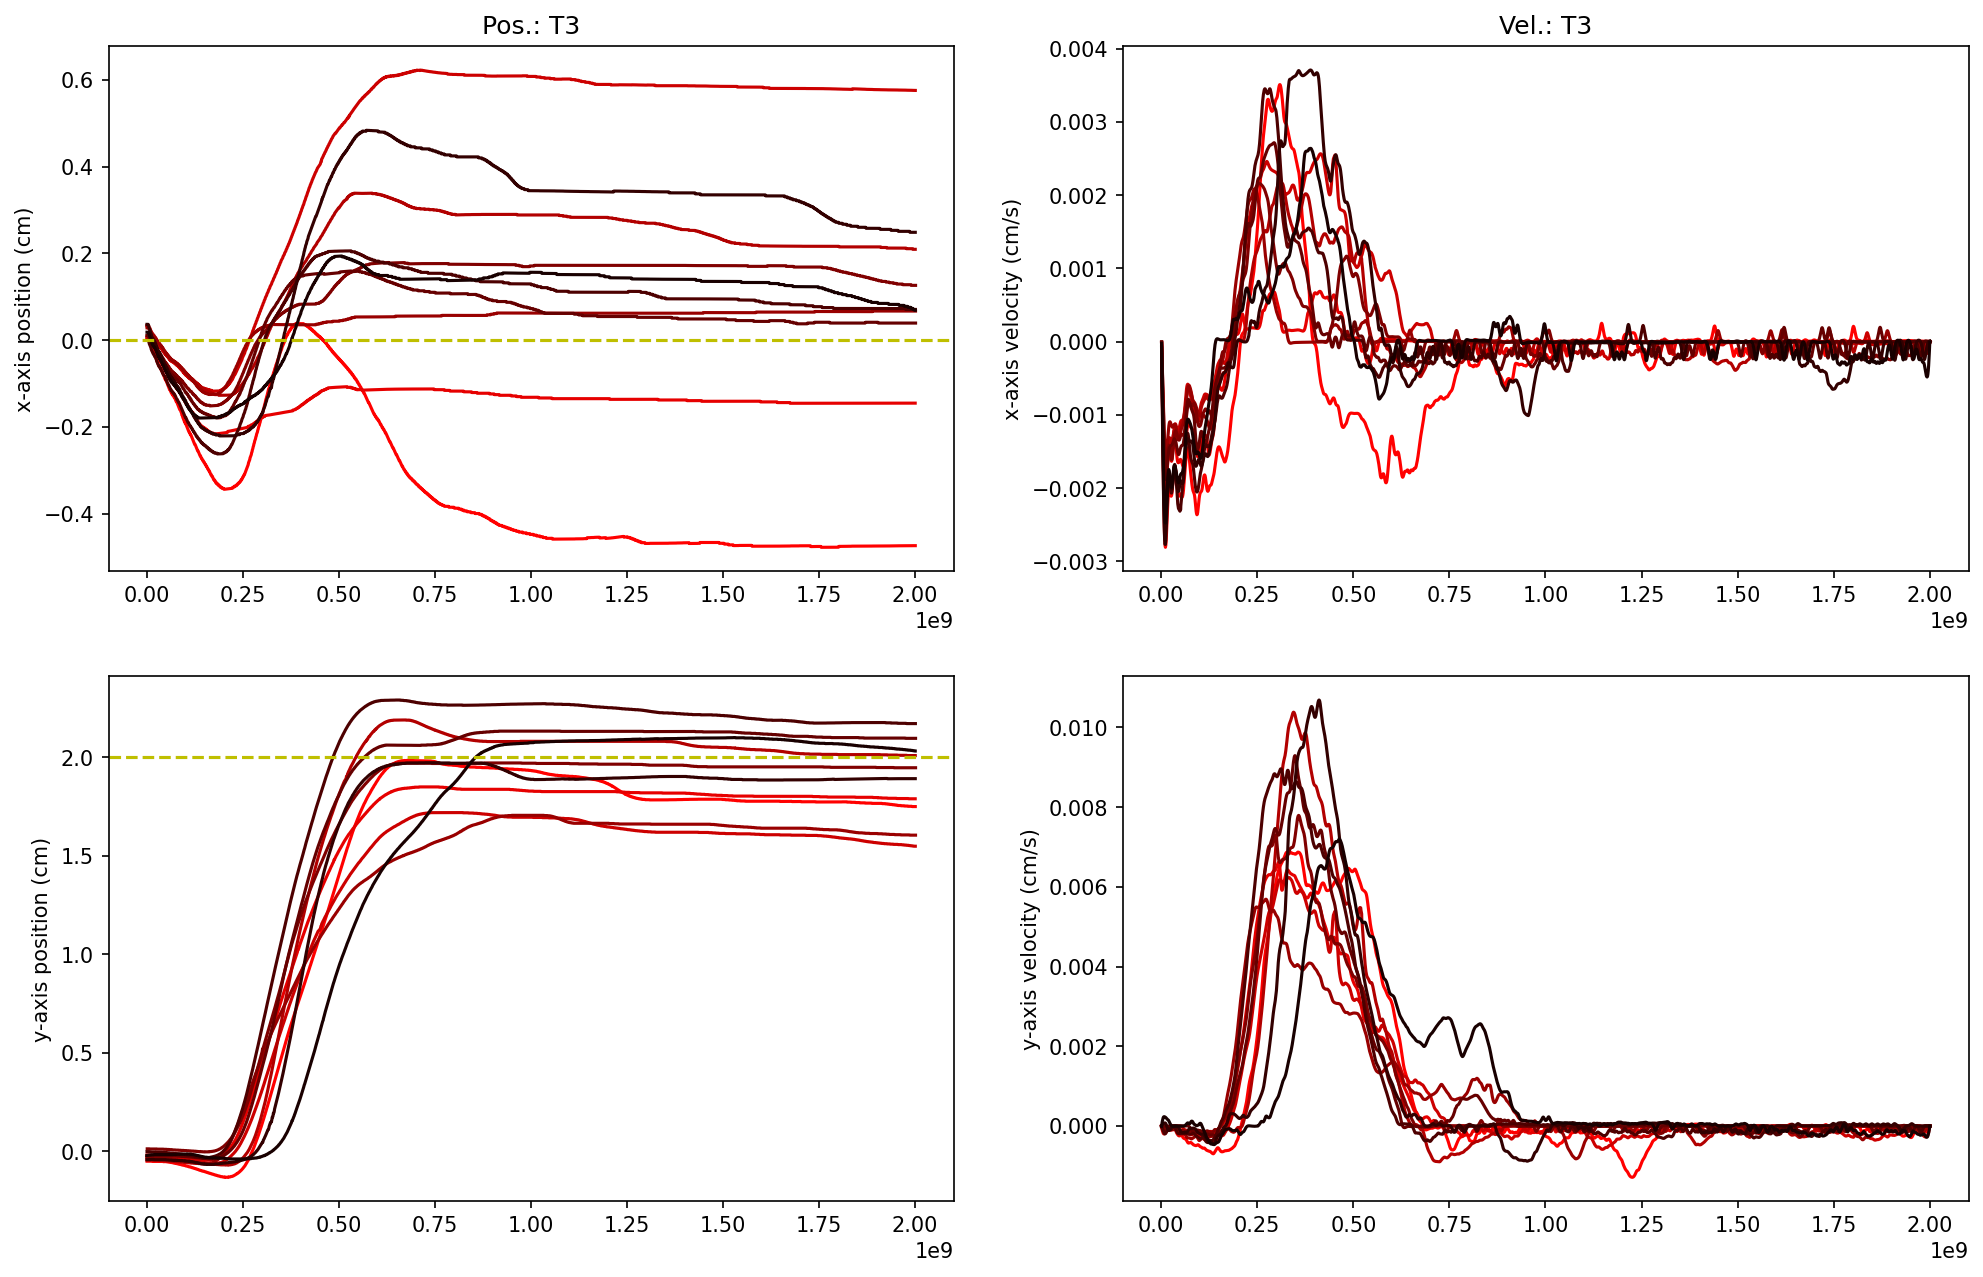

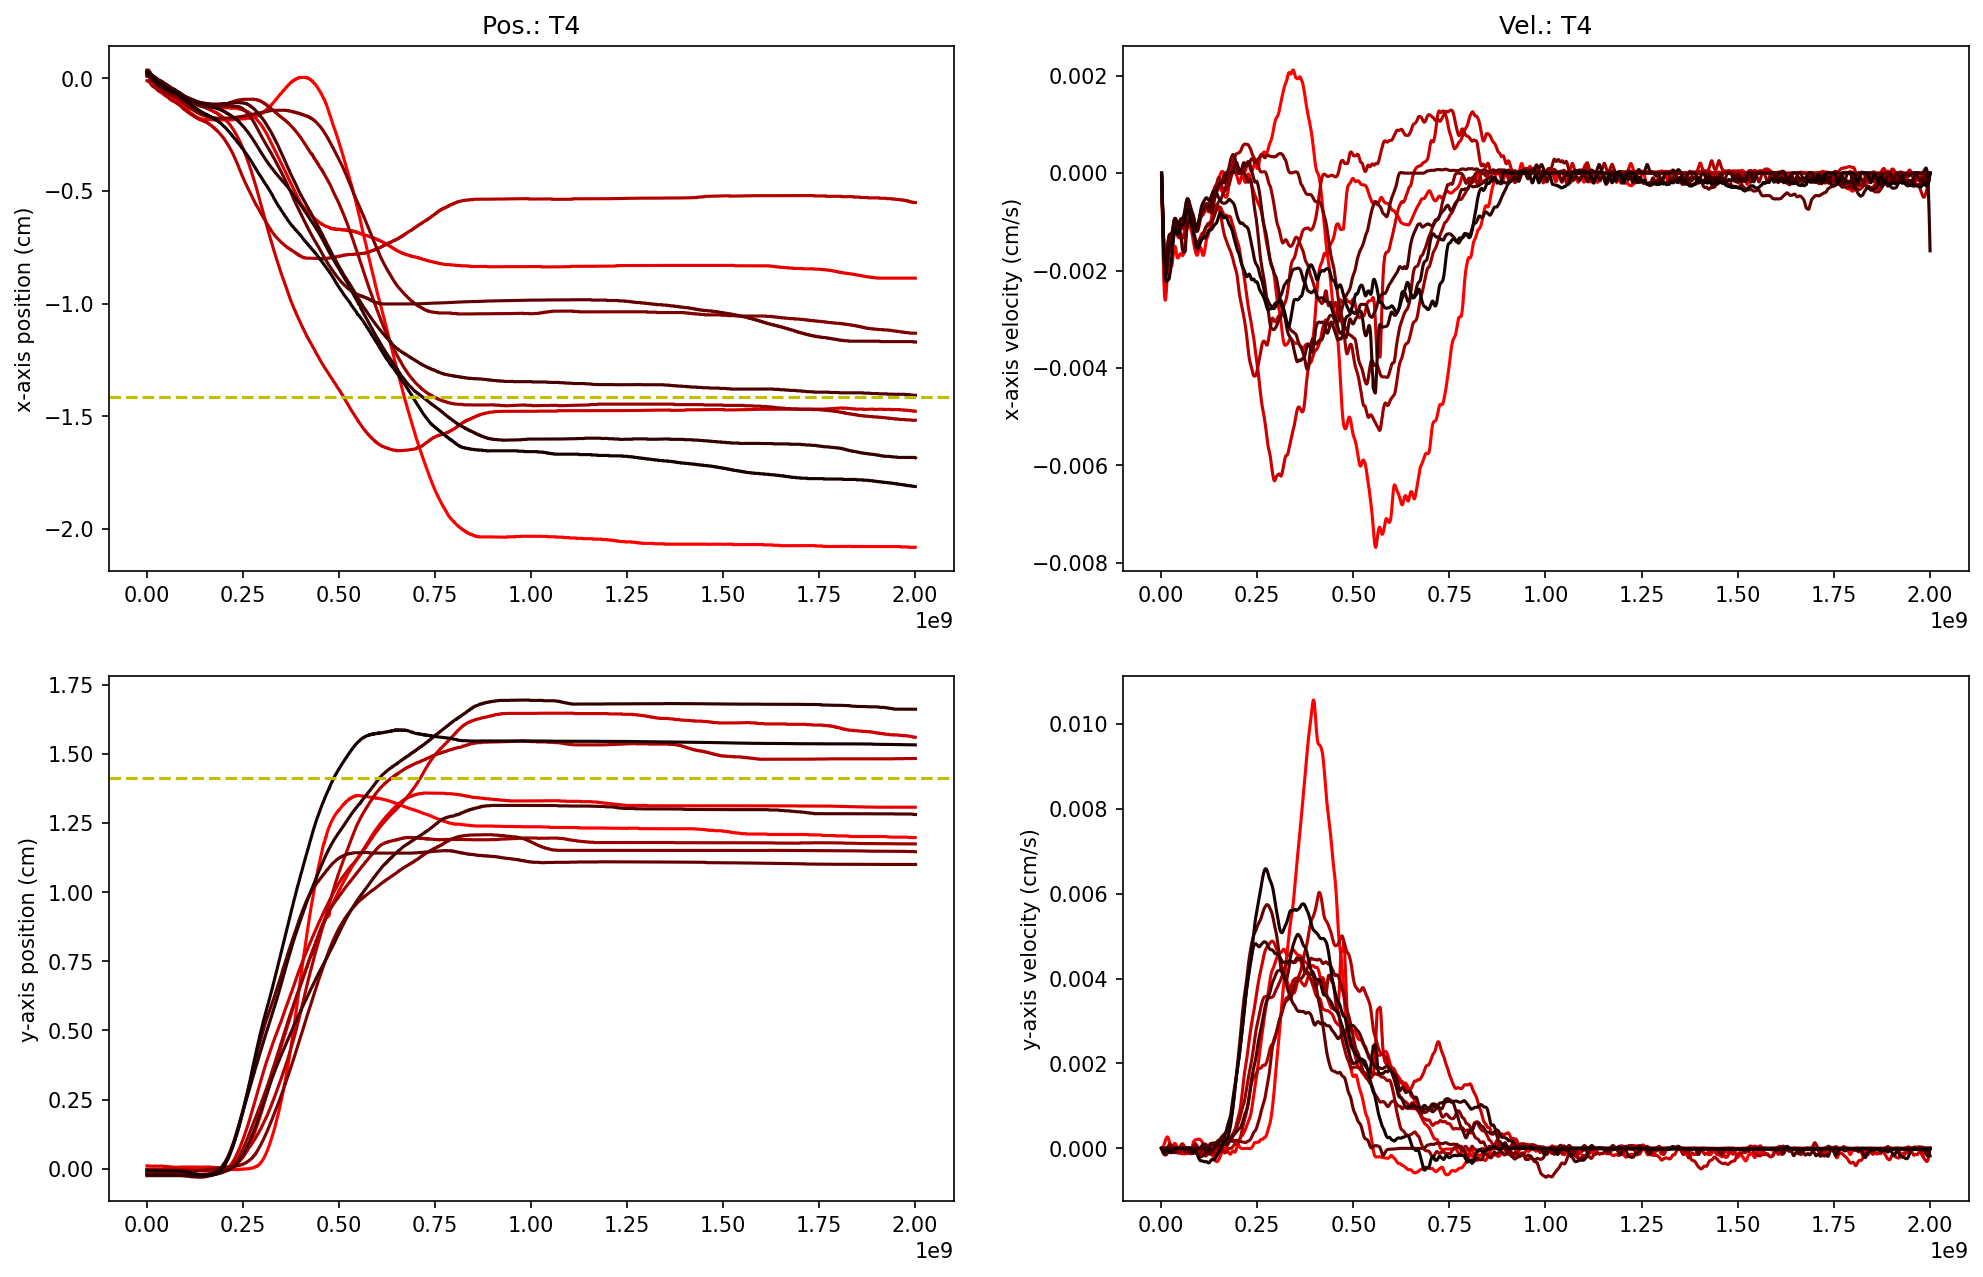

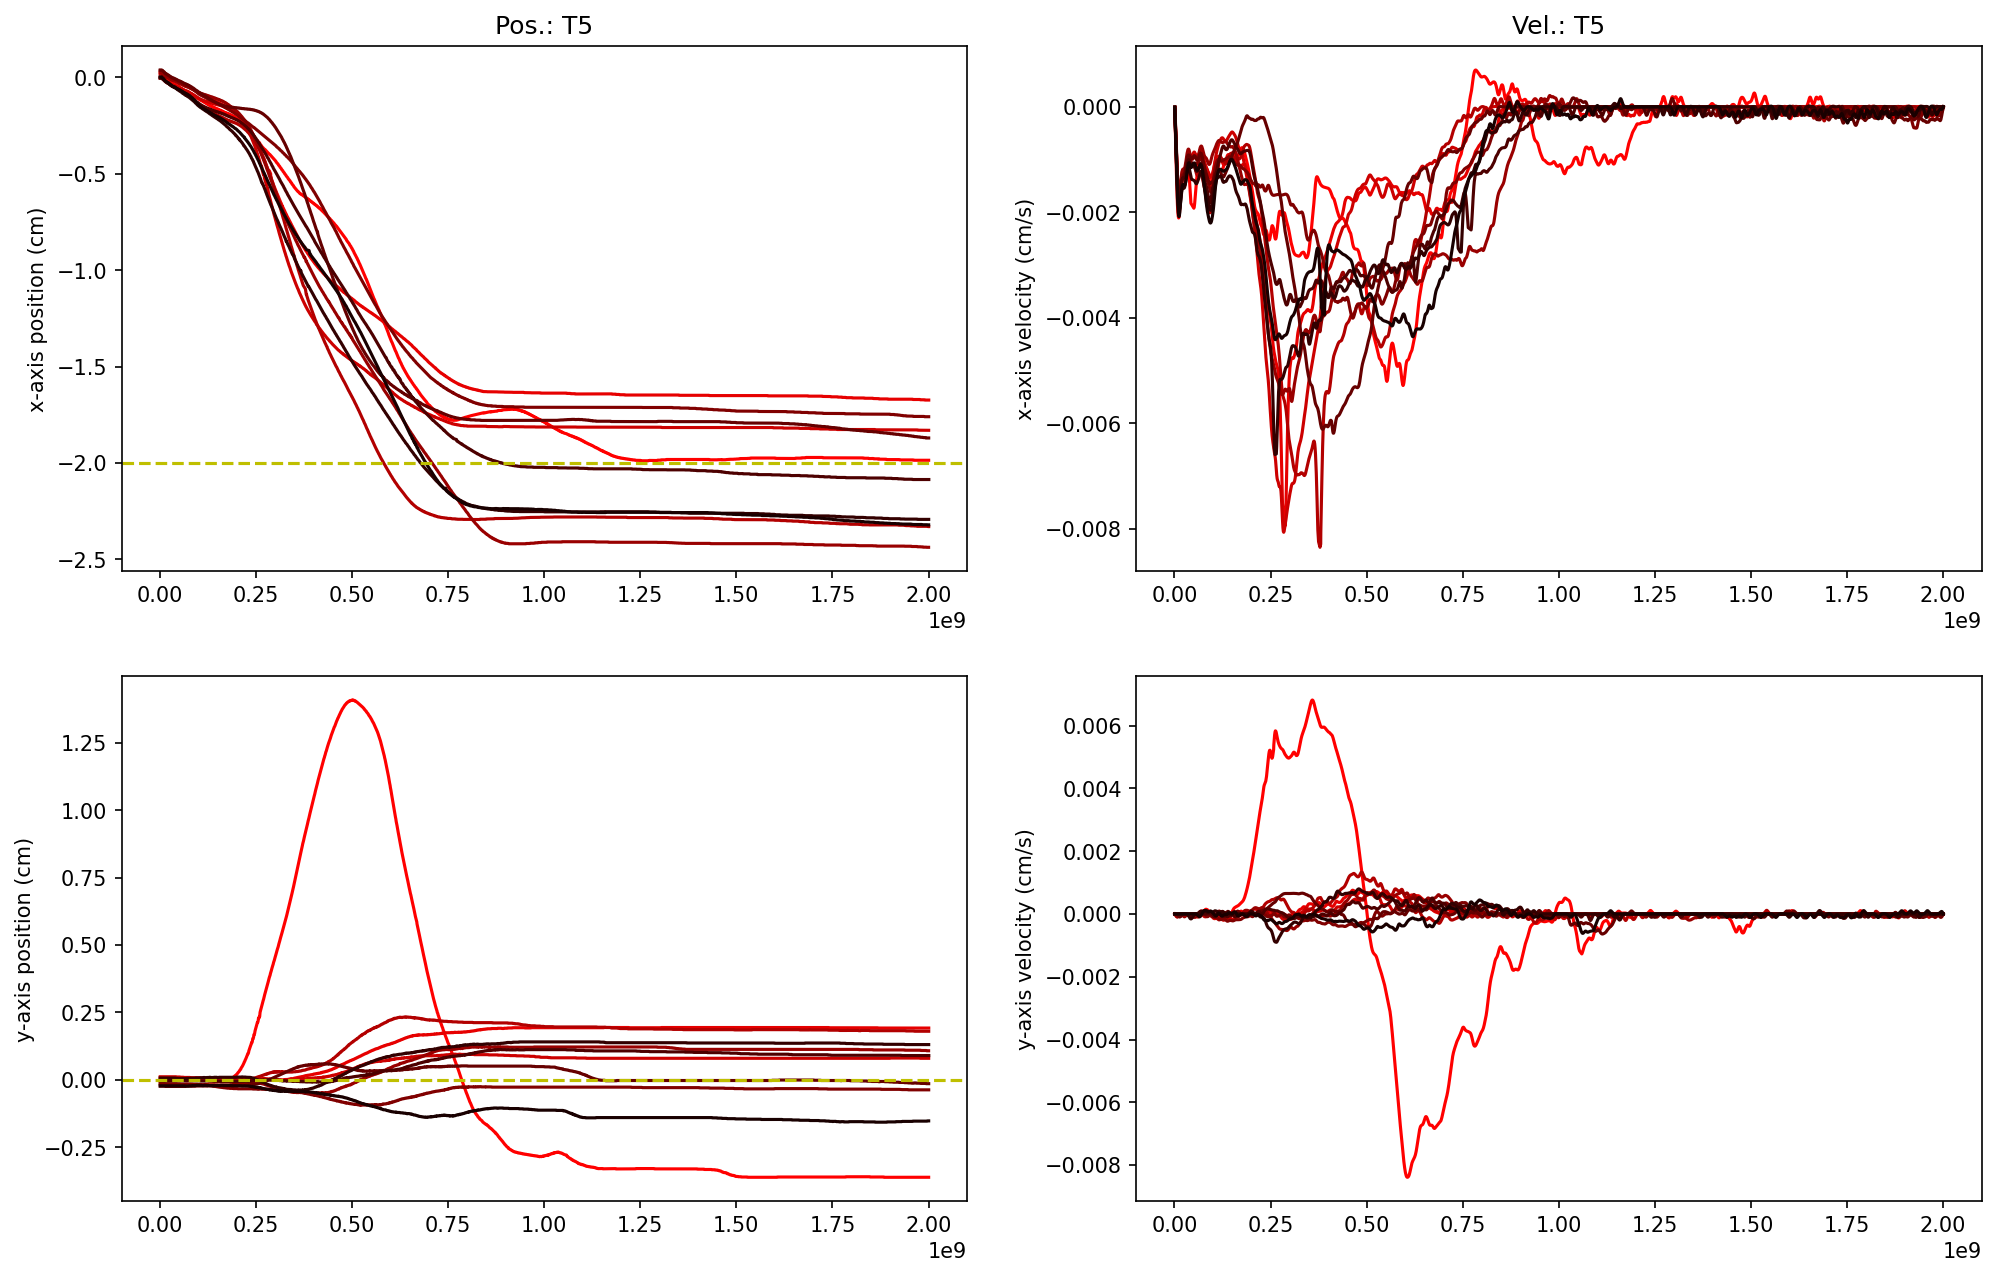

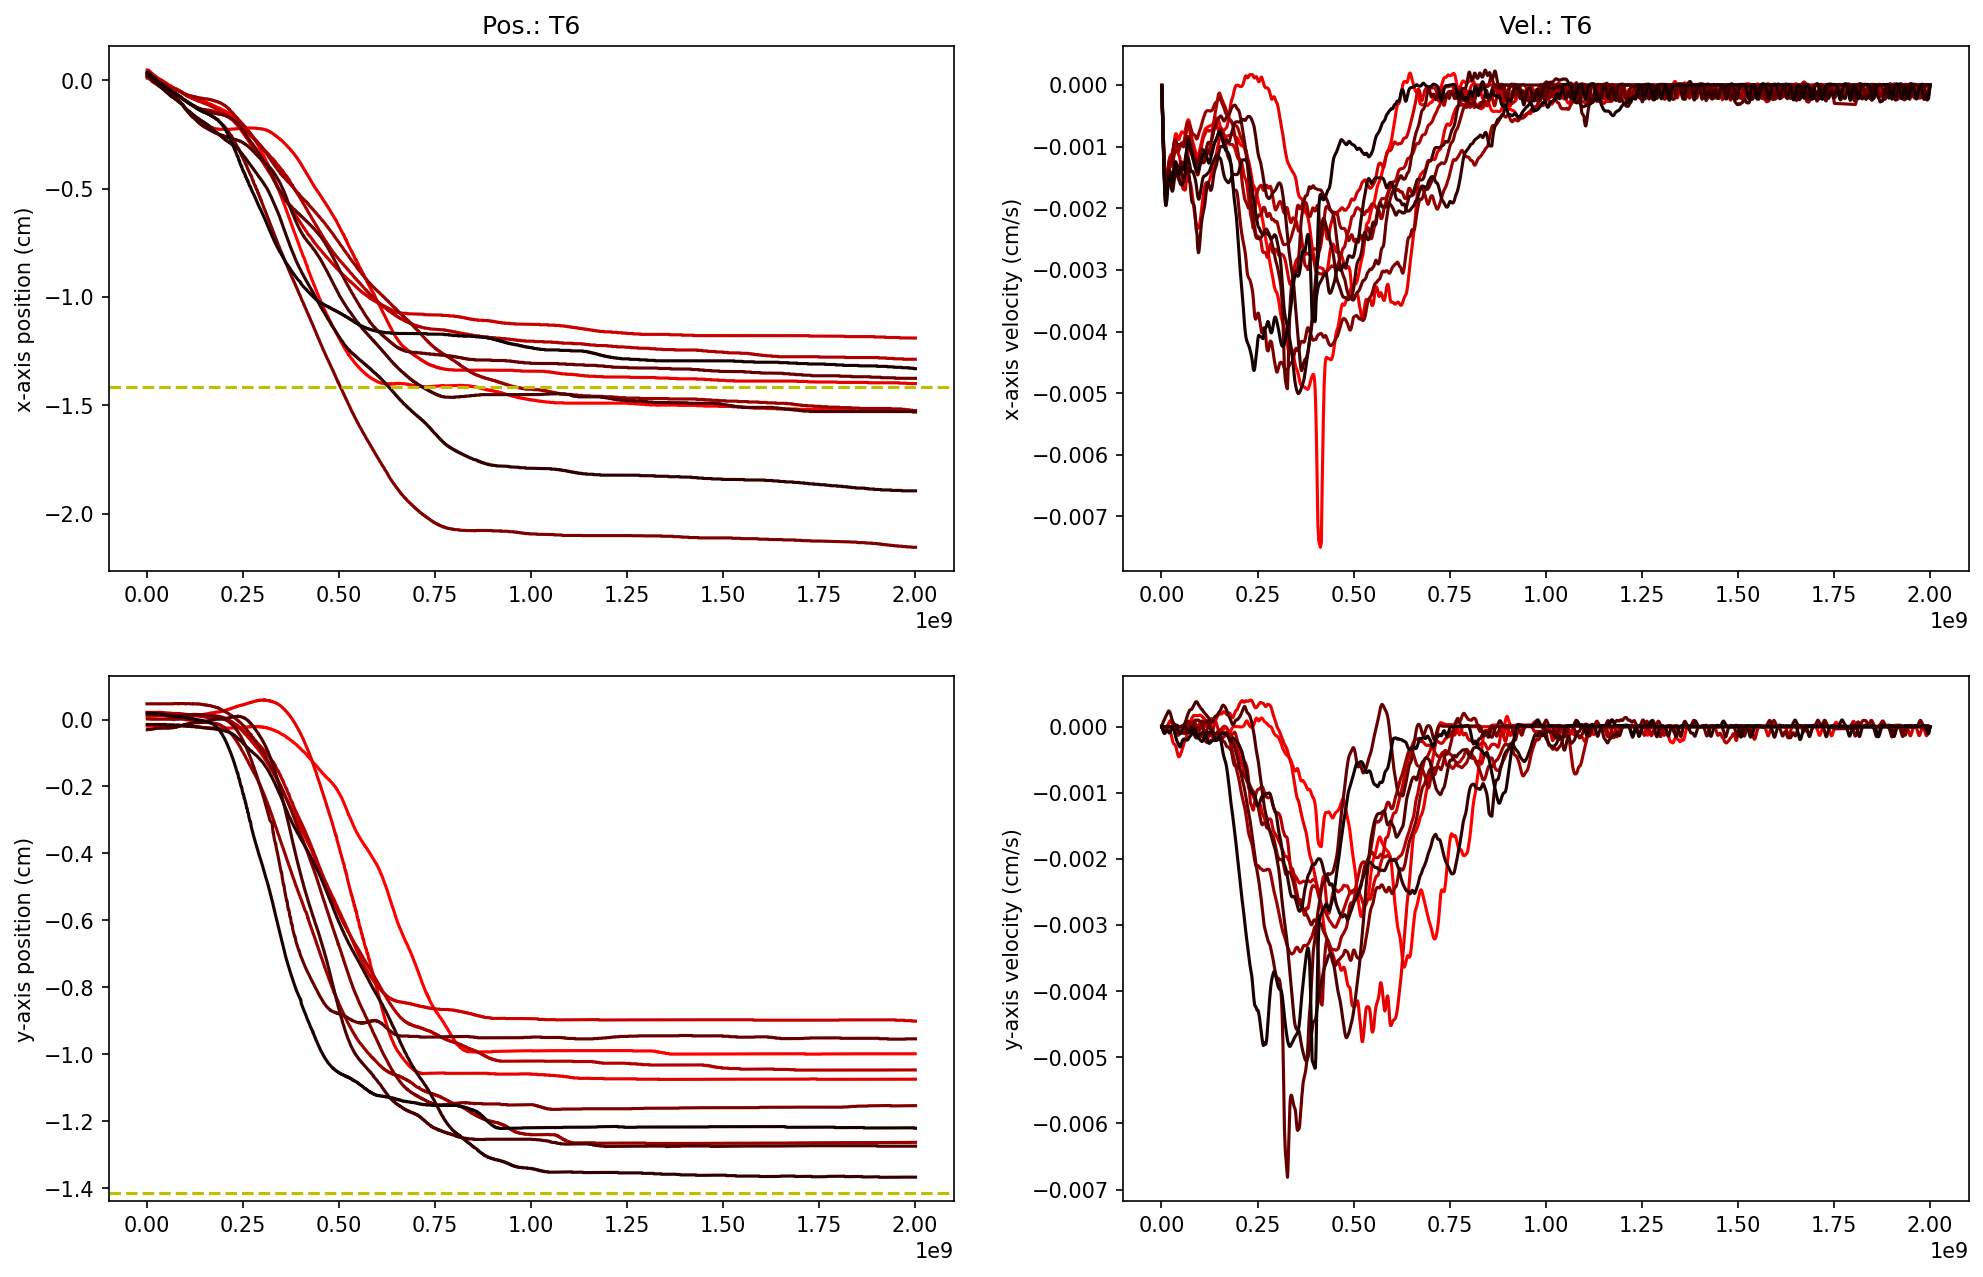

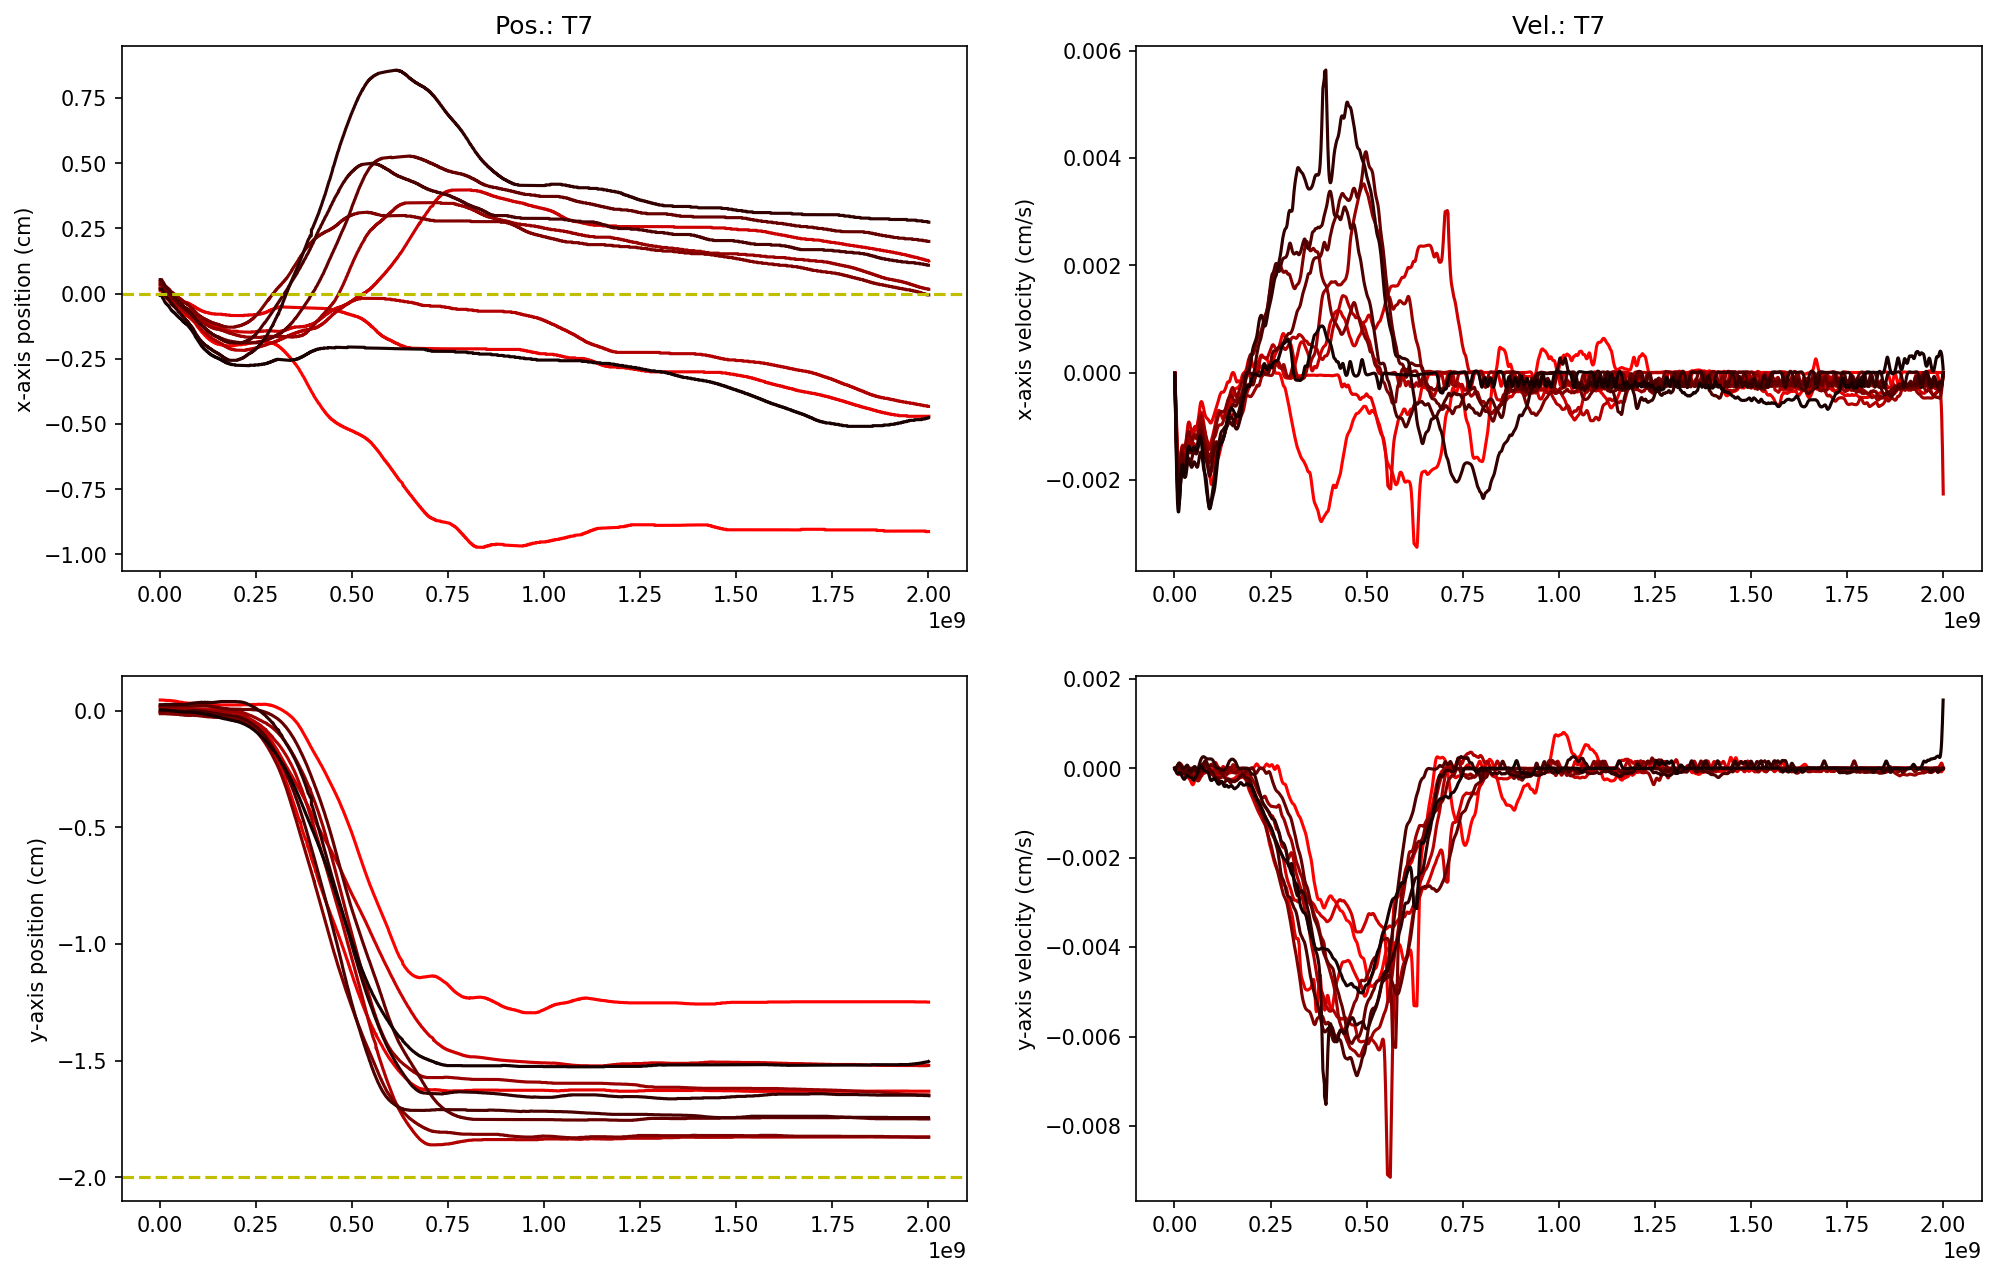

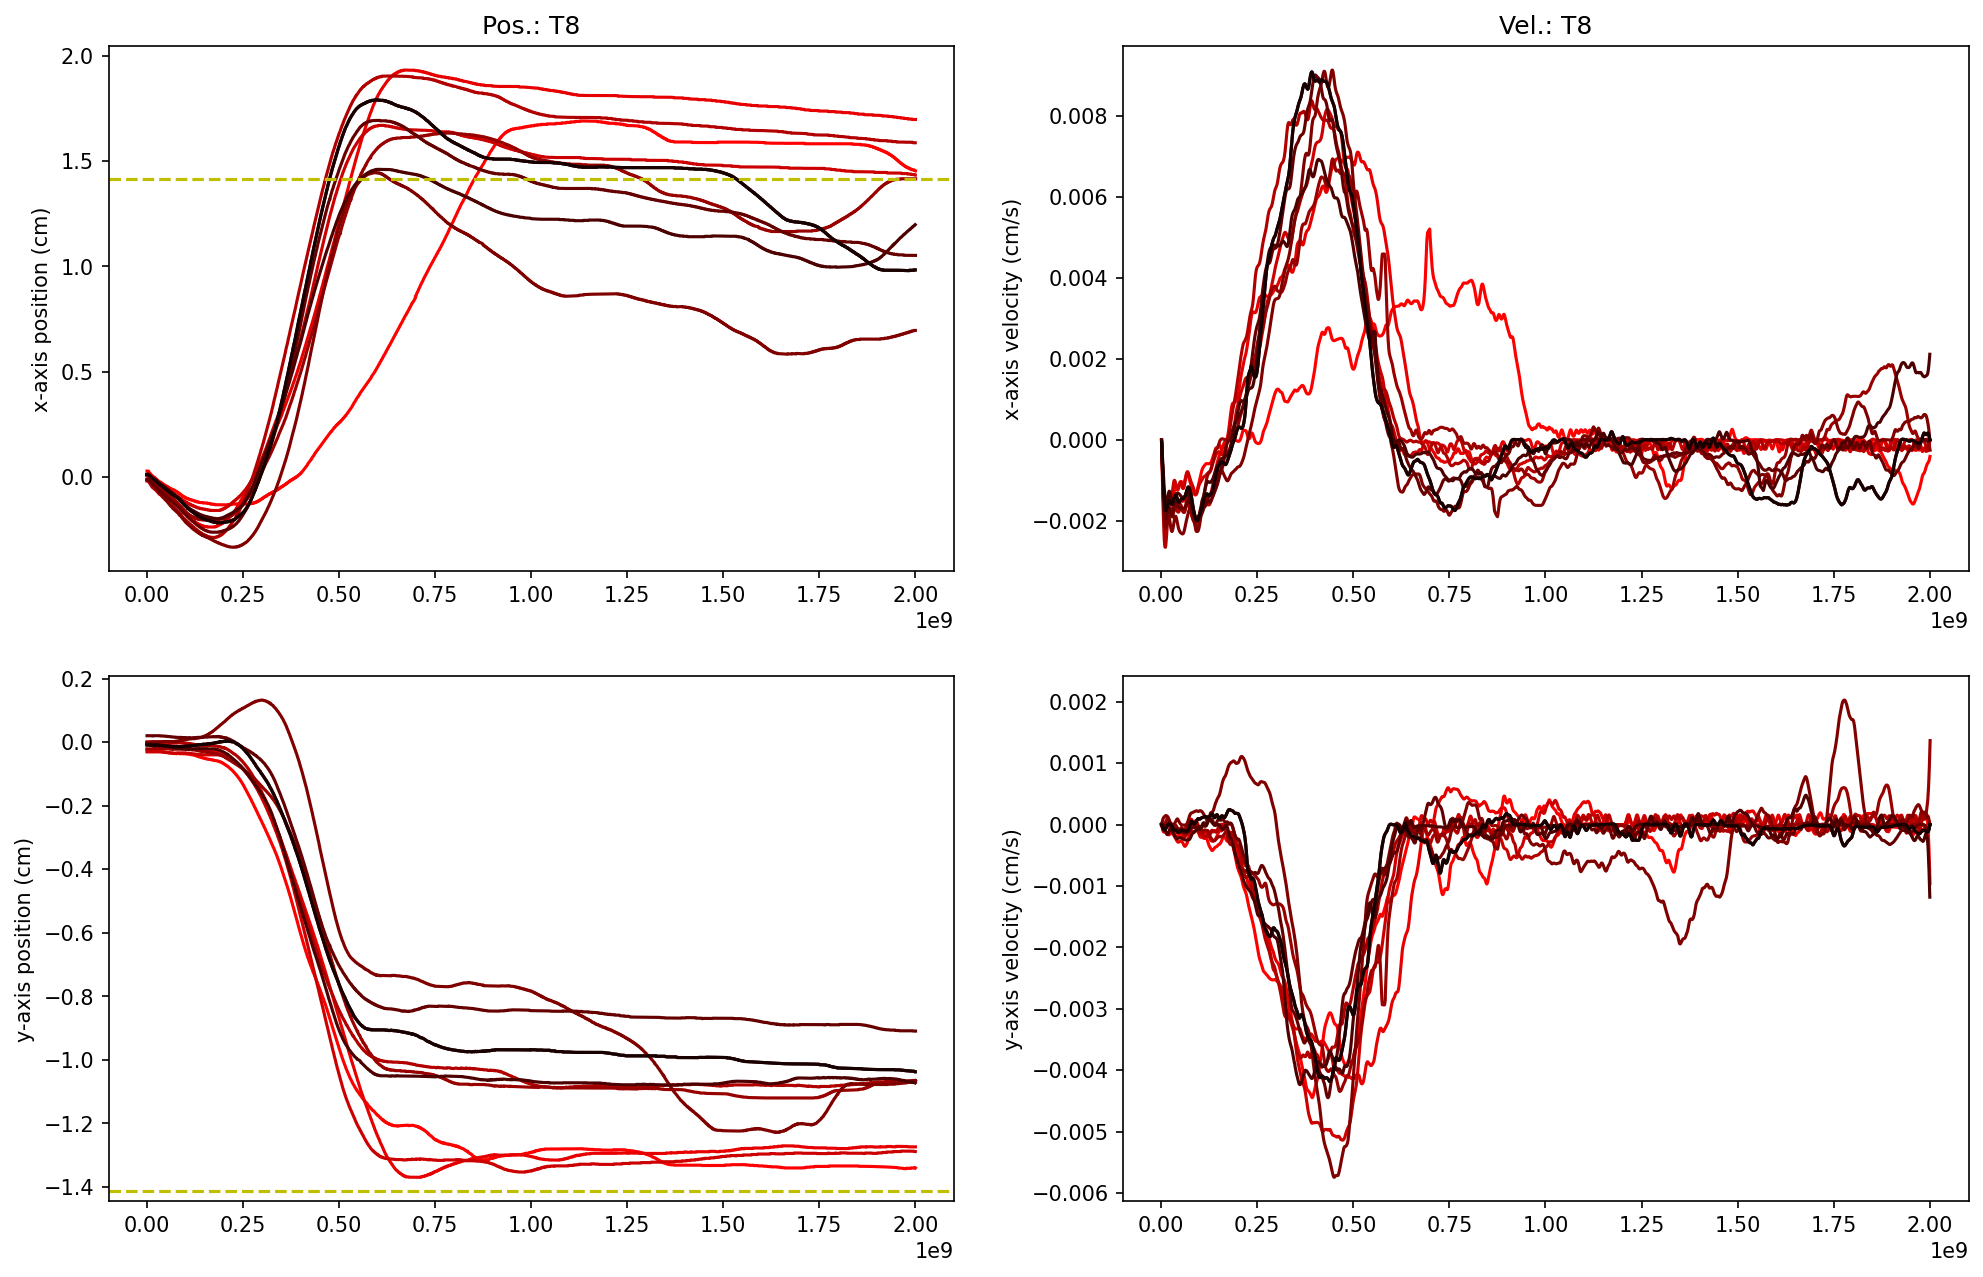

In [6]:
c1='red' #blue
c2='black' #green
    
for tar,tar_list in zip(targets,trial_list):
    # Plot the evolution of x position
    #plt.figure(figsize=(16, 10), dpi=150)
    fig = plt.figure(figsize=(16, 10), dpi=150)
    axs = fig.subplots(2, 2)

    for idx,trial in enumerate(tar_list): 
        axs[0,0].plot(trial[:,2],trial[:,0],color=colorFader(c1,c2,idx/max_number_of_trials_per_target))
    axs[0,0].axhline(y = math.cos(math.pi*(tar-1)/4.)*target_distance, color = 'y', linestyle = 'dashed')
    # adding title to the plot
    axs[0,0].set_title('Pos.: T'+str(int(tar)))
      
    # adding Label to the x-axis
    axs[0,0].set_ylabel('x-axis position (cm)')
    
    for idx,trial in enumerate(tar_list): 
        axs[0,1].plot(trial[:,2],trial[:,5],color=colorFader(c1,c2,idx/max_number_of_trials_per_target))
    axs[0,1].set_title('Vel.: T'+str(int(tar)))
    
    # adding Label to the x-axis
    axs[0,1].set_ylabel('x-axis velocity (cm/s)')
    
    
    # Plot the evolution of y position
    for idx,trial in enumerate(tar_list): 
        axs[1,0].plot(trial[:,2],trial[:,1],color=colorFader(c1,c2,idx/max_number_of_trials_per_target))
    axs[1,0].axhline(y = math.sin(math.pi*(tar-1)/4.)*target_distance, color = 'y', linestyle = 'dashed')
    
    # adding Label to the x-axis
    axs[1,0].set_ylabel('y-axis position (cm)')
    
    # Plot the evolution of x velocity
    for idx,trial in enumerate(tar_list): 
        axs[1,1].plot(trial[:,2],trial[:,6],color=colorFader(c1,c2,idx/max_number_of_trials_per_target))
    
    # adding Label to the x-axis
    axs[1,1].set_ylabel('y-axis velocity (cm/s)')
    
    
    # Plot the evolution of z position
    #for idx,trial in enumerate(tar_list): 
    #    axs[2,0].plot(trial[:,3],trial[:,2],color=colorFader(c1,c2,idx/n))
    
    # adding Label to the z-axis
    #axs[2,0].set_xlabel('Time (s)')
    #axs[2,0].set_ylabel('z-axis position')
    
    # Plot the evolution of z velocity
    #for idx,trial in enumerate(tar_list): 
    #    axs[2,1].plot(trial[:,3],trial[:,9],color=colorFader(c1,c2,idx/n))
    
    # adding Label to the x-axis
    #axs[2,1].set_xlabel('Time (s)')
    #axs[2,1].set_ylabel('z-axis velocity')
   

Plot the evolution in 2D

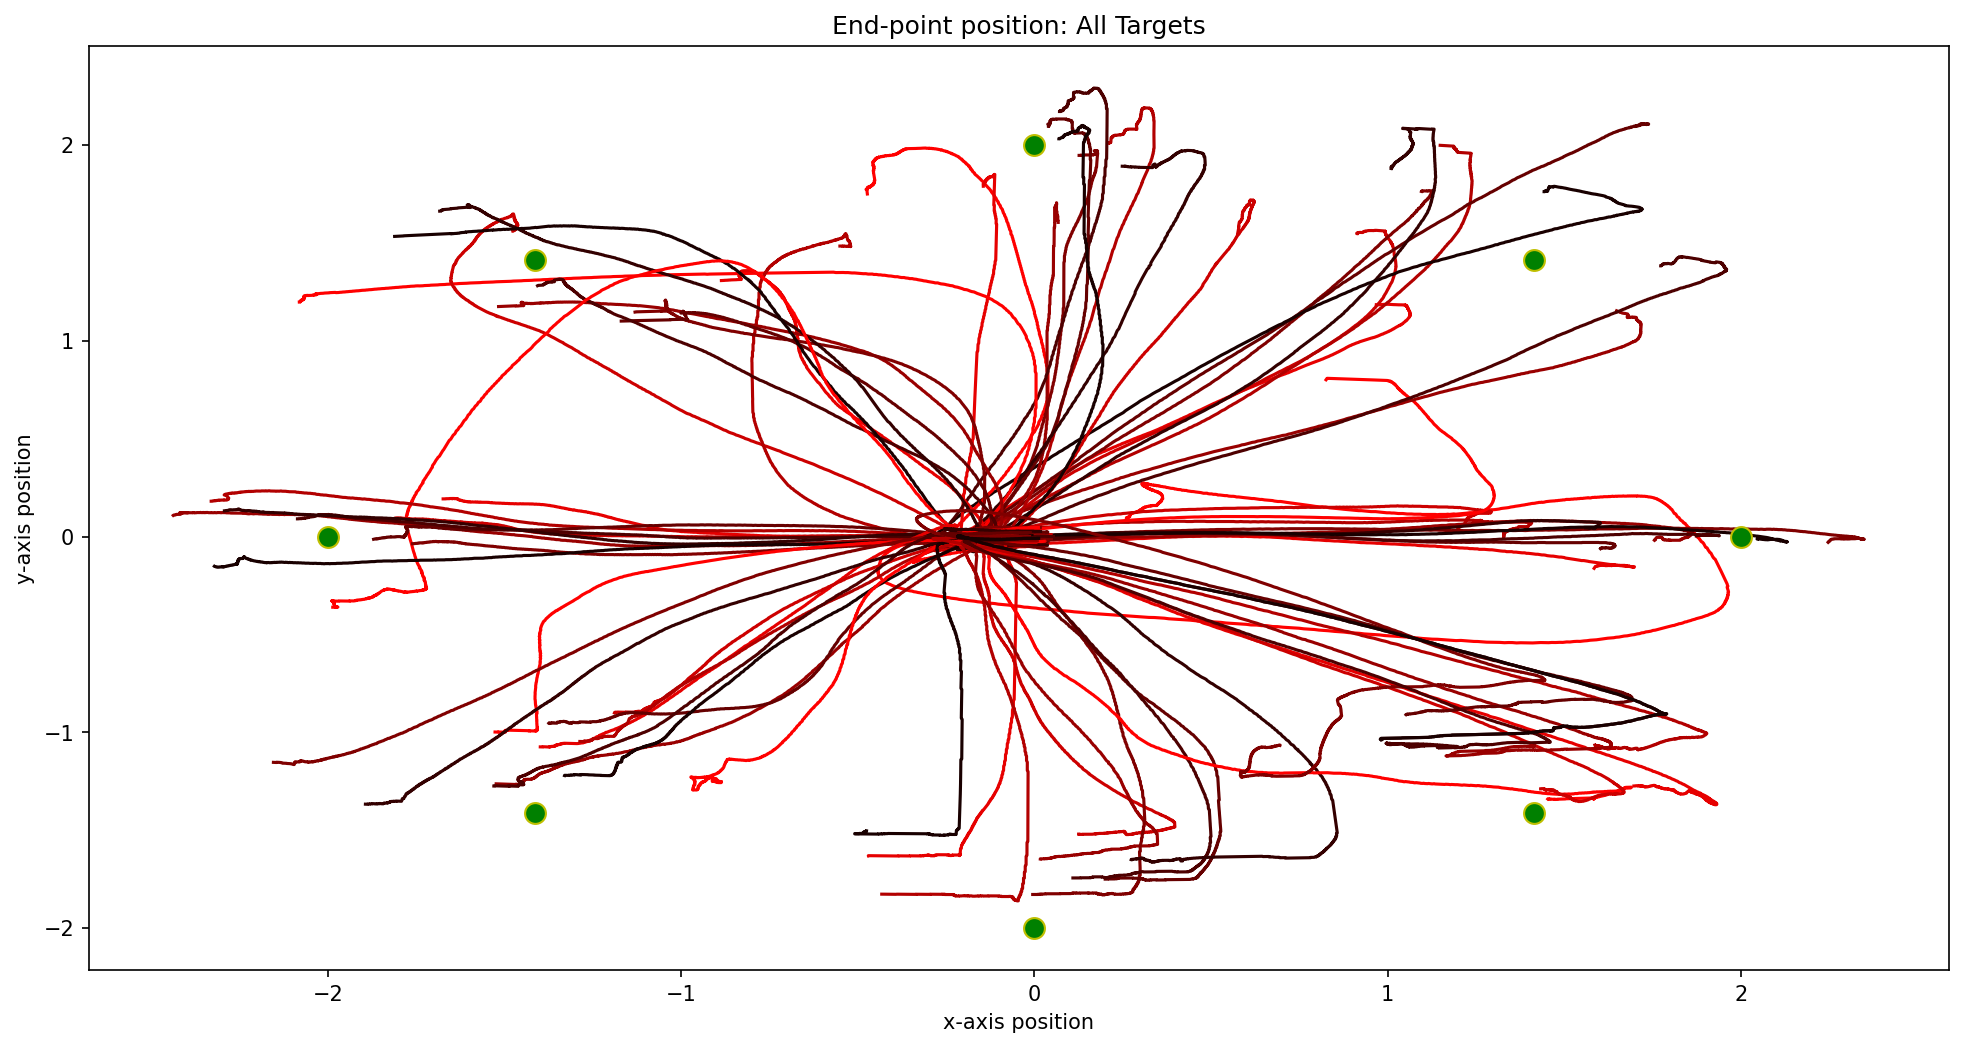

In [7]:
c1='red' #blue
c2='black' #green

plt.figure(figsize=(16, 8), dpi=150)
    
for tar,tar_list in zip(targets,trial_list):
    # Plot the evolution of x position
    for idx,trial in enumerate(tar_list): 
        plt.plot(trial[:,0],trial[:,1],color=colorFader(c1,c2,idx/max_number_of_trials_per_target))
    plt.plot(math.cos(math.pi*(tar-1)/4.)*target_distance, math.sin(math.pi*(tar-1)/4.)*target_distance, marker="o", markersize=10, markeredgecolor="y", markerfacecolor="green")
    
# adding title to the plot
plt.title('End-point position: All Targets')

# adding Label to the x-axis
plt.xlabel('x-axis position')
plt.ylabel('y-axis position')

plt.show()
plt.close()
    

Calculate the end-point of every trial

In [8]:
end_point_x = []
end_point_y = []
distance = []
end_time = []
for tar,trial in zip(targets,trial_list):
    end_point_x_t = numpy.zeros((len(trial),1))
    end_point_y_t = numpy.zeros((len(trial),1))
    end_time_t = numpy.zeros((len(trial),1))
    for idx,data in enumerate(trial):
        end_point_x_t[idx] = data[-1,0]
        end_point_y_t[idx] = data[-1,1]
        end_time_t[idx] = data[-1,2]
    distance_t = numpy.sqrt(numpy.power(end_point_x_t-math.cos(math.pi*(tar-1)/4.)*target_distance,2)+numpy.power(end_point_y_t-math.sin(math.pi*(tar-1)/4.)*target_distance,2))
    end_point_x.append(end_point_x_t)
    end_point_y.append(end_point_y_t)
    end_time.append(end_time_t)
    distance.append(distance_t)

Plot the end-point position evolution

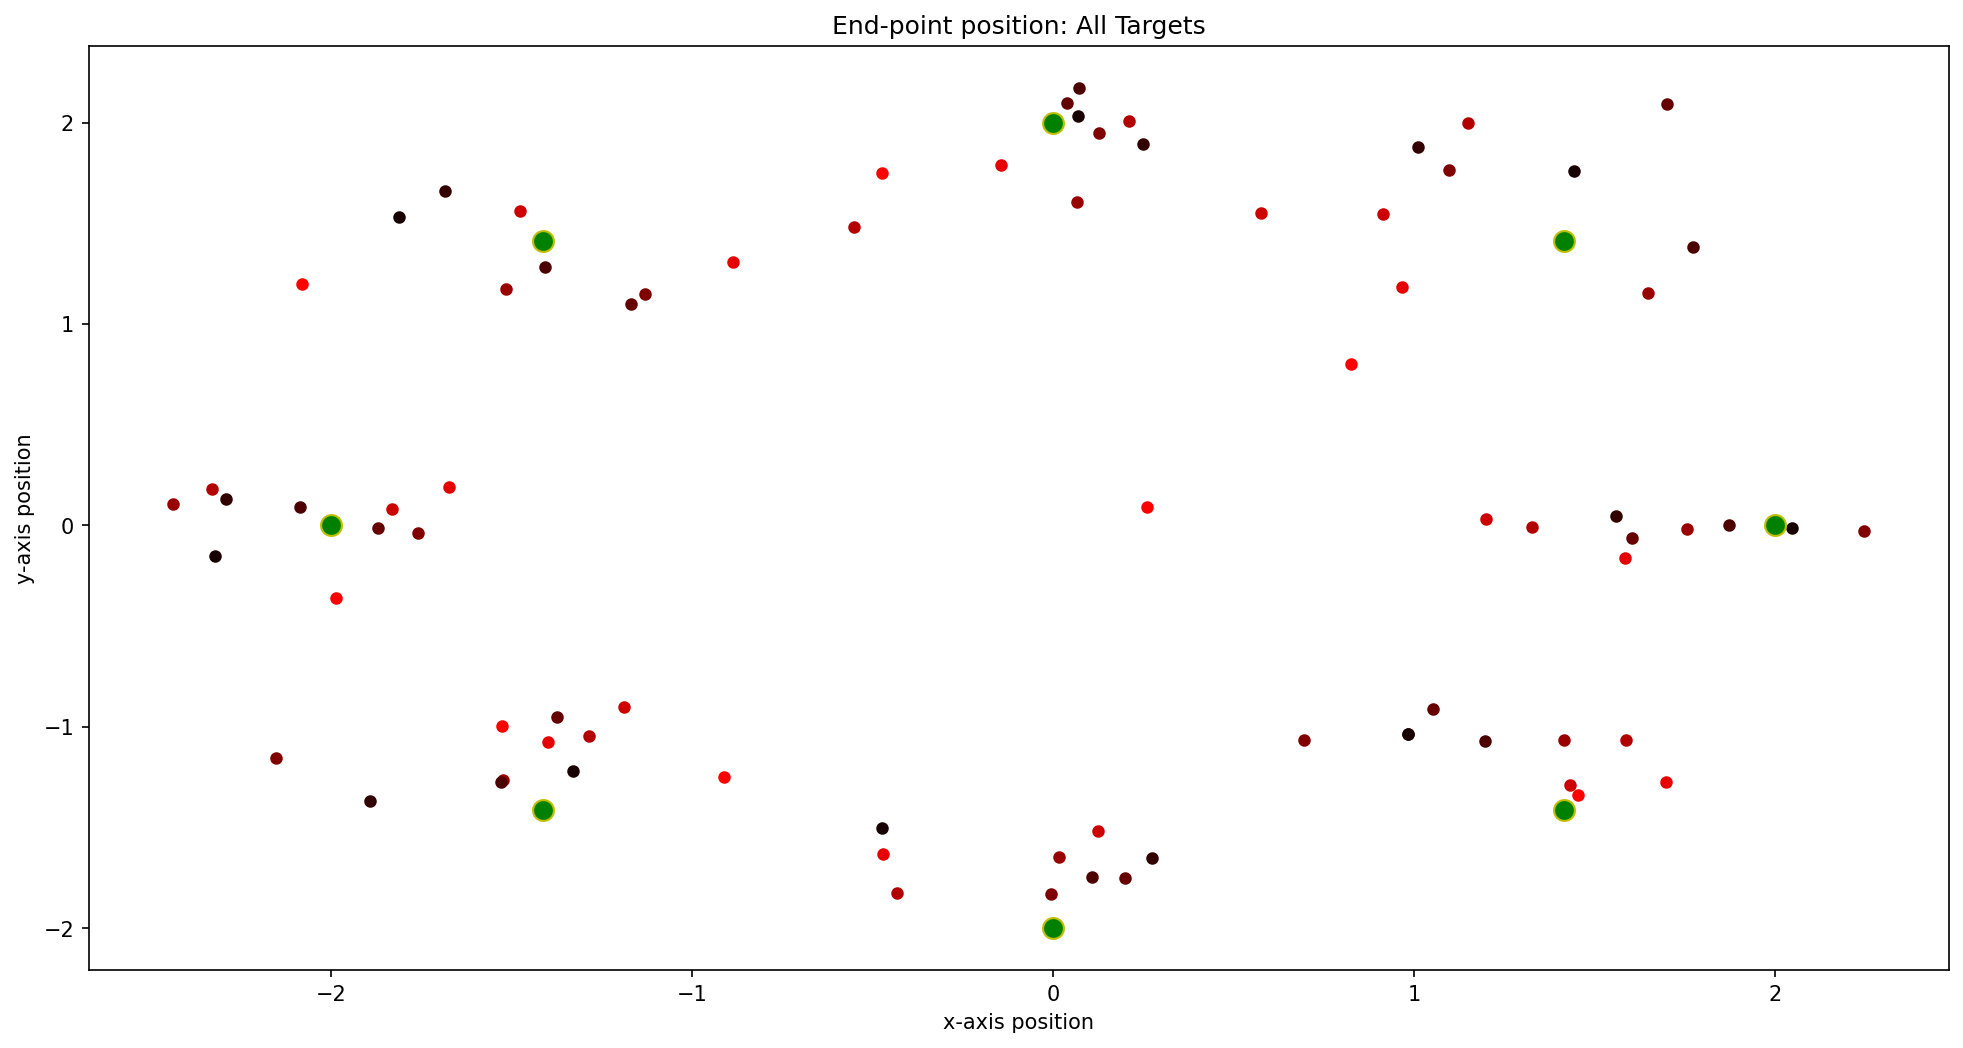

In [9]:
c1='red' #blue
c2='black' #green

plt.figure(figsize=(16, 8), dpi=150)
    
for idx,tar in enumerate(targets):
    # Plot the evolution of x position
    for idx1,(x,y) in enumerate(zip(end_point_x[idx],end_point_y[idx][:])):
        plt.plot(x,y,marker="o", markersize=5,color=colorFader(c1,c2,idx1/max_number_of_trials_per_target))
    plt.plot(math.cos(math.pi*(tar-1)/4.)*target_distance, math.sin(math.pi*(tar-1)/4.)*target_distance, marker="o", markersize=10, markeredgecolor="y", markerfacecolor="green")
    
# adding title to the plot
plt.title('End-point position: All Targets')

# adding Label to the x-axis
plt.xlabel('x-axis position')
plt.ylabel('y-axis position')

plt.show()
plt.close()

Plot the distance evolution

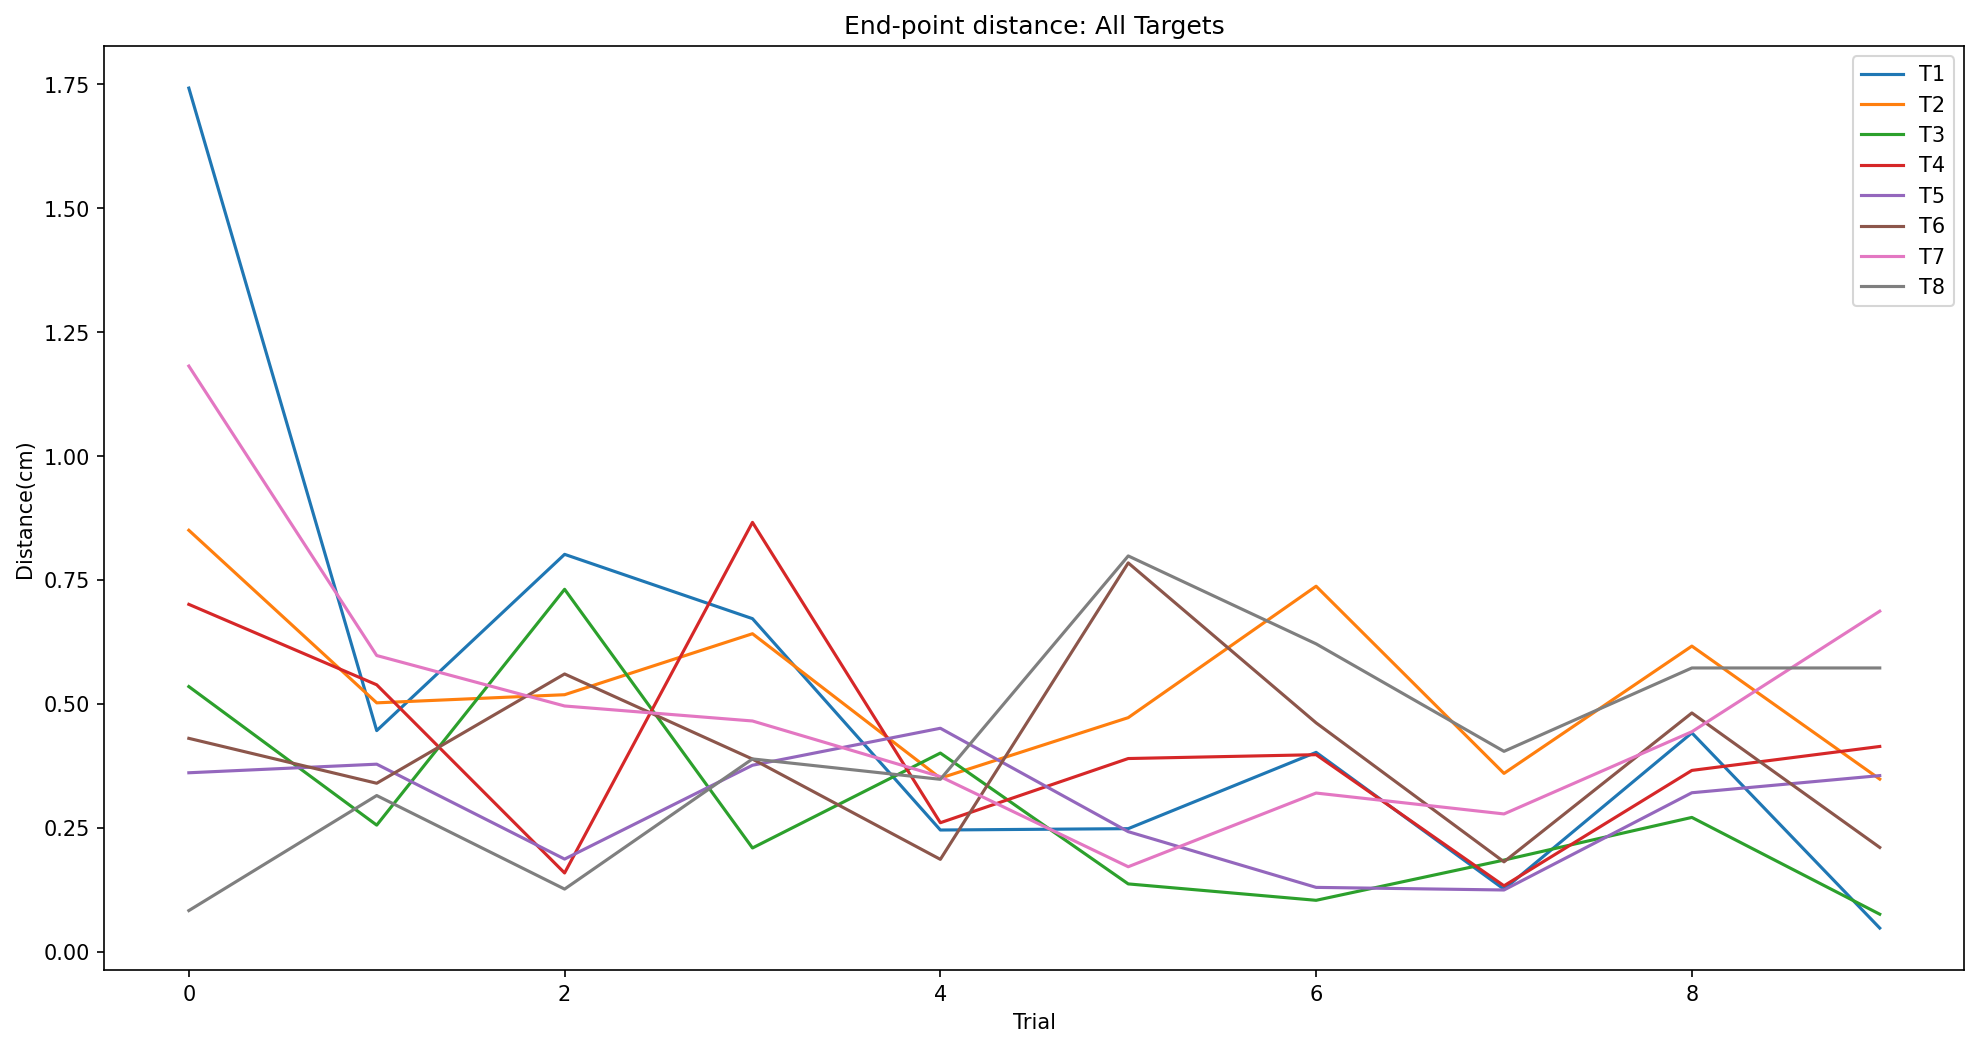

In [10]:
c1='red' #blue
c2='black' #green

plt.figure(figsize=(16, 8), dpi=150)
    
for idx,tar in enumerate(targets):
    # Plot the evolution of the end-point distance for each target
    plt.plot(distance[idx],label='T'+str(int(tar)))
plt.legend()

#plt.ylim([0.0,0.5])
    
# adding title to the plot
plt.title('End-point distance: All Targets')

# adding Label to the x-axis
plt.xlabel('Trial')
plt.ylabel('Distance(cm)')

plt.show()
plt.close()

Plot the distance evolution

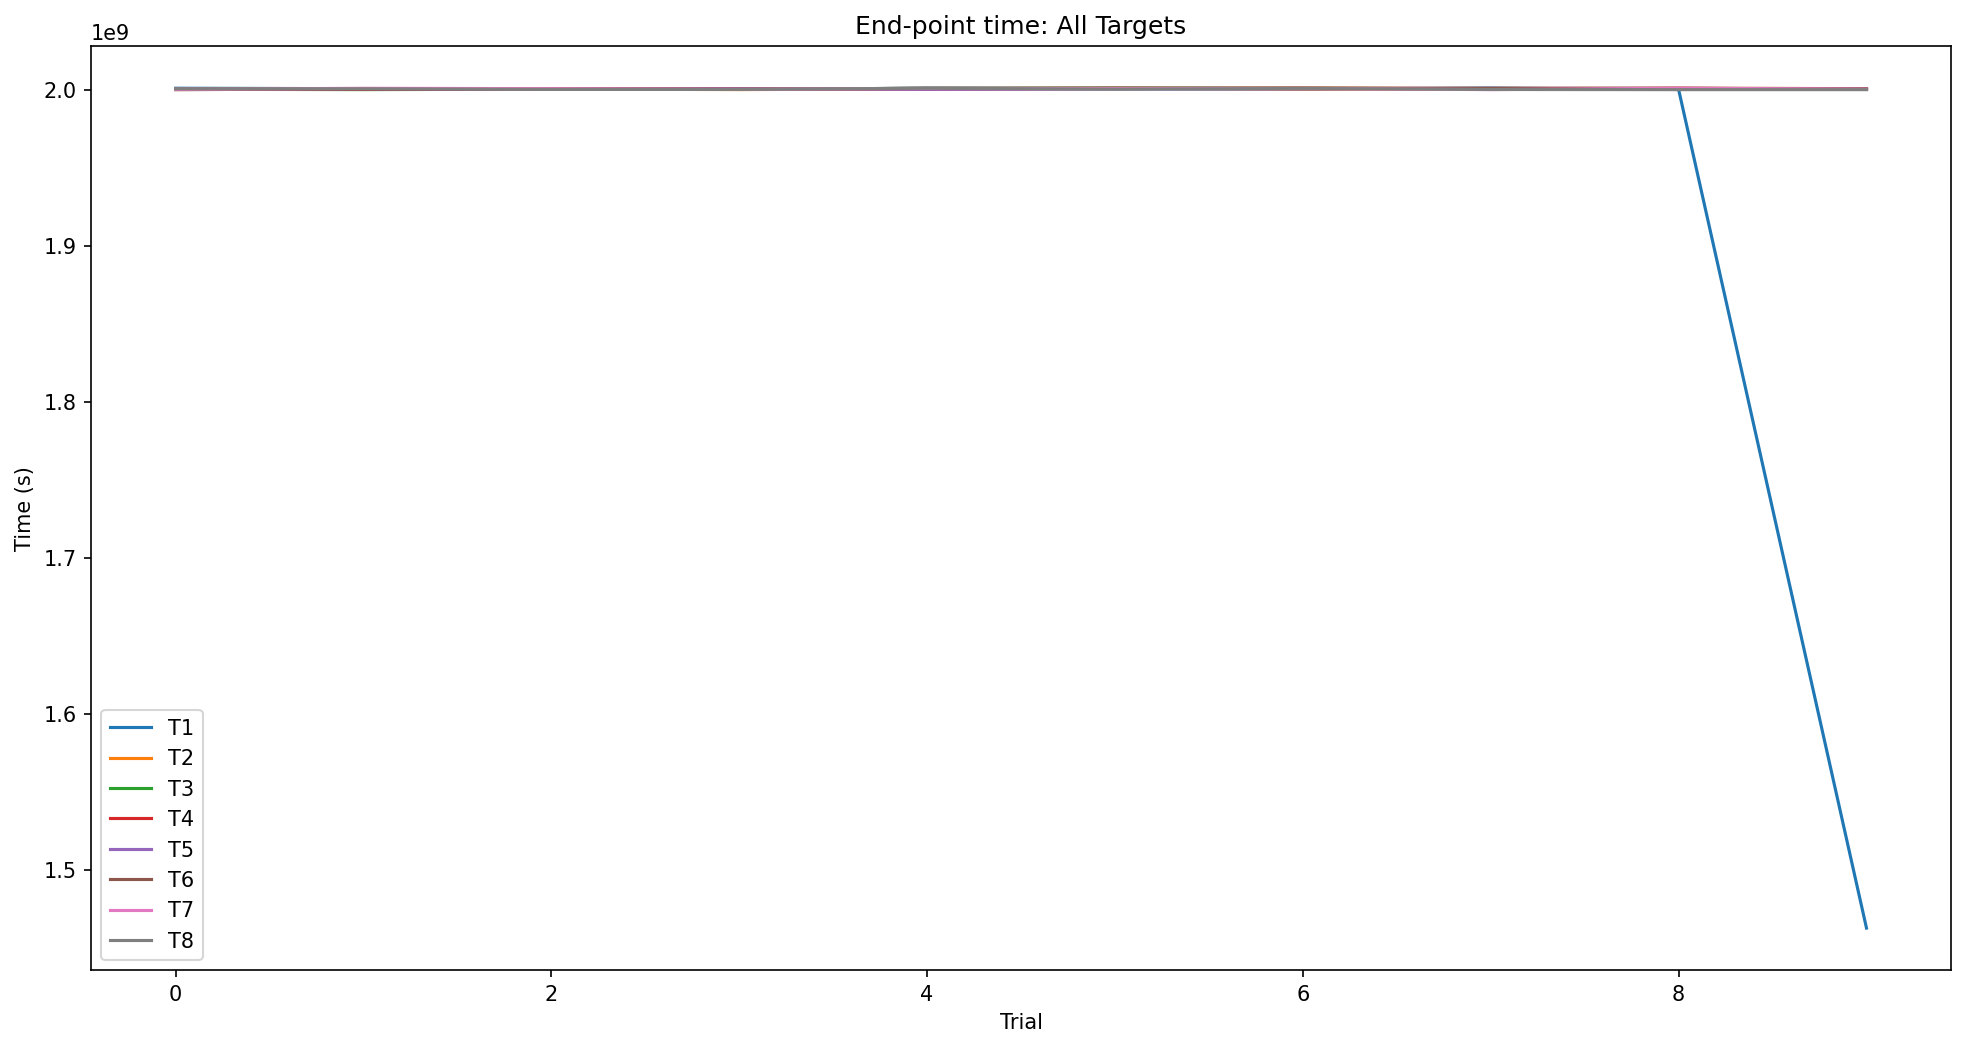

In [11]:
c1='red' #blue
c2='black' #green

plt.figure(figsize=(16, 8), dpi=150)
    
for idx,tar in enumerate(targets):
    # Plot the evolution of the end-point distance for each target
    plt.plot(end_time[idx],label='T'+str(int(tar)))
plt.legend()

# adding title to the plot
plt.title('End-point time: All Targets')

# adding Label to the x-axis
plt.xlabel('Trial')
plt.ylabel('Time (s)')

plt.show()
plt.close()